## scikit-learn의 교차 검증

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [9]:
#scikit-learn 홈페이지에서 회귀 모델에 score 메소드가 있는지 확인하기
#있으면 score 쓰고 없으면 해당 함수에 있는 다른 평가도구 찾아보기
scores = cross_val_score(logreg, iris.data, iris.target) #train_test_split 따로 안 해줘도 됨  
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [10]:
print("교차 검증 평균 점수:", scores.mean())

교차 검증 평균 점수: 0.9733333333333334


In [12]:
#세부데이터(특히 실행 시간)를 알아야 할 때 corss_validate 사용
#일반적으로 쓸 일은 없음
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
display(res)

{'fit_time': array([0.00994349, 0.01396275, 0.01797628, 0.01097012, 0.00894308]),
 'score_time': array([0.0009973 , 0.        , 0.00099778, 0.        , 0.00102234]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [16]:
#pandas로 보기 좋게 바꾸기
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.009943,0.000997,0.966667,0.966667
1,0.013963,0.000000,1.000000,0.966667
2,0.017976,0.000998,0.933333,0.983333
3,0.010970,0.000000,0.966667,0.983333
4,0.008943,0.001022,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.012359
score_time     0.000603
test_score     0.973333
train_score    0.975000
dtype: float64


## 교차 검증 상세 옵션

In [21]:
from sklearn.model_selection import KFold

#split에 여러 옵션을 넣어야 할 때는 kfold 객체를 cv에 넣어줌
kfold = KFold(n_splits=5)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [19]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


In [20]:
#shuffle은 데이터를 섞어줌
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


## LOOCV(Leave-One-Out cross-validation)

In [23]:
from sklearn.model_selection import LeaveOneOut

#데이터가 부족할 때 많이 쓰는 방법
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


## 임의 분할 교차 검증

In [32]:
from sklearn.model_selection import ShuffleSplit

#KFOLD 들어가는 자리에 넣어줌(가장 많이 사용함)
#데이터셋을 무작위로 분할하는 데 사용(편향을 방지할 수 있음)
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수: \n", scores)

교차 검증 점수: 
 [0.94666667 0.93333333 0.94666667 0.98666667 0.94666667 0.97333333
 0.96       0.96       0.96       0.97333333]


## 그룹별 교차 검증 

In [35]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GroupKFold

# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.75       0.6        0.66666667]


## 그리드 서치(Grid Search)

### 간단한 그리드 서치

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 간단한 그리드 서치 구현
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(
    "훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
        X_train.shape[0], X_test.shape[0]
    )
)

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)

#모든 조합이 훈련된다는 안전성은 높이면서 아이디어는 유지하는 방법이 필요해! -> threds

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


### 매개변수 과대적합과 검증 세트

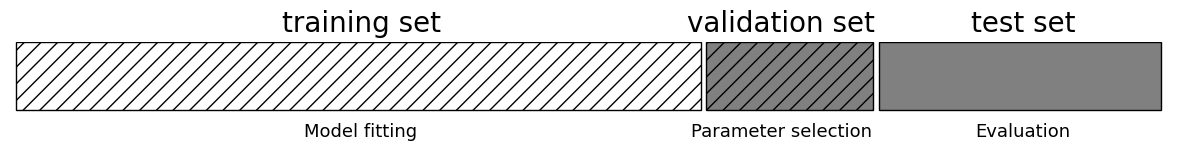

In [45]:
#train+valid : test = 8: 2로 맞추는 게 좋음
mglearn.plots.plot_threefold_split()

In [47]:
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1
)
print(
    "훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
    " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])
)

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


### 교차 검증을 사용한 그리드  서치

In [55]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

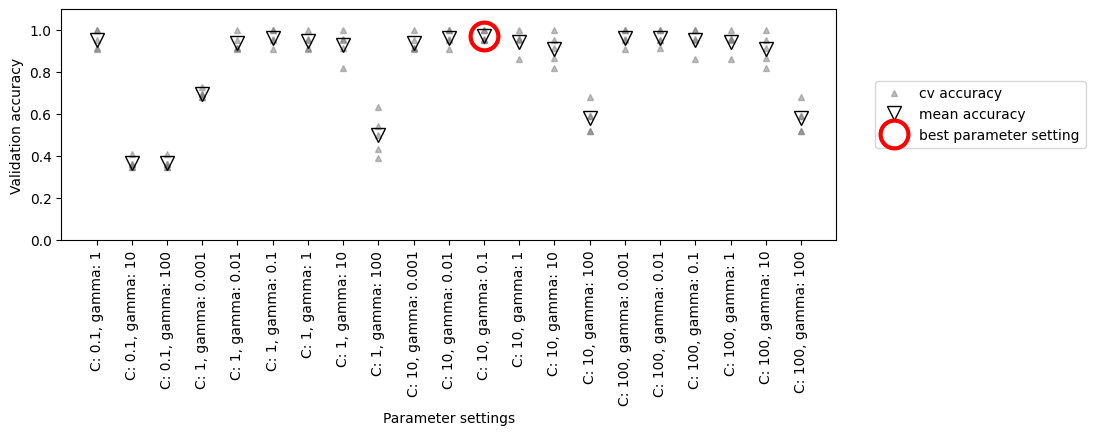

In [56]:
mglearn.plots.plot_cross_val_selection()

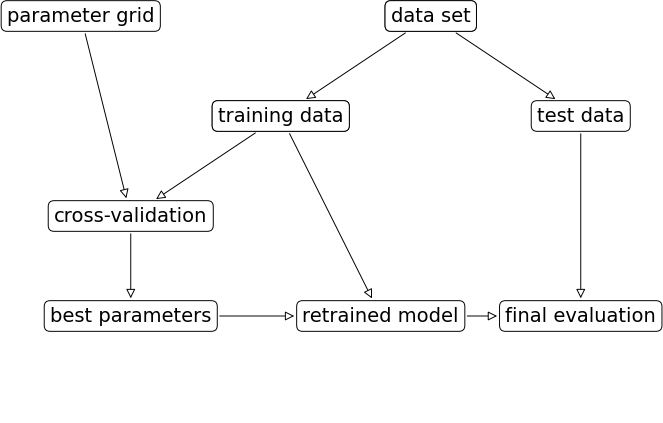

In [57]:
mglearn.plots.plot_grid_search_overview()

In [48]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#cv값은 3~5 정도가 적당함
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [52]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [53]:
#best_params_로 쓰기(best_params 아님!)
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97


In [54]:
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=10, gamma=0.1)


### 교차 검증 결과 분석

In [59]:
pd.set_option("display.max_columns", None)
# DataFrame으로 변환합니다
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행을 출력합니다
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.000797,0.000794,0.000802,0.000997,0.000598
std_fit_time,0.000399,0.000397,0.000401,0.000001,0.000488
mean_score_time,0.000597,0.000597,0.000598,0.000198,0.000792
std_score_time,0.000488,0.000487,0.000489,0.000396,0.000396
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


### 비대칭 매개변수 그리드 탐색
* 비대칭 -> 반복문의 짝이 맞지 않음
* 버전업되면서 괜찮아짐

In [60]:
param_grid = [
    {
        "kernel": ["rbf"],
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
    },
    {"kernel": ["linear"], "C": [0.001, 0.01, 0.1, 1, 10, 100]},
]
print("그리드 목록:\n", param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


## 오차행렬

In [63]:
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

# 인위적인 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

테스트 세트 점수: 0.88
예측된 레이블의 고유값: [1]
테스트 점수: 0.24


In [ ]:
# 0 나눗셈 경고를 피하기 위해 zero_division 매개변수를 0으로 지정합니다.
print(
    classification_report(
        y_test, pred_most_frequent, target_names=["9 아님", "9"], zero_division=0
    )
)

## ROC와 AUC

In [ ]:
from sklearn.metrics import roc_curve
svc = SVC(gamma=0.05).fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(
    fpr[close_zero],
    tpr[close_zero],
    "o",
    markersize=10,
    label="임계값 0",
    fillstyle="none",
    c="k",
    mew=2,
)
plt.legend(loc=4)
plt.show()  # 책에는 없음